Step 1) Functions for creating spectrograms and PNGs from WAV files

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr, S=None, n_fft=1024, hop_length=80, win_length=320, window='hann', center=True, pad_mode='constant', power=2.0)
    #ms = librosa.feature.melspectrogram(y=y, sr=sr, S=None)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Step 2) Converting wav to pngs and saving images as x and labels as y

In [22]:
# All locations
folder_name = "../dataset_va9"
path_clean = folder_name + "/clean/"
path_0dB = folder_name + "/0dB/"
path_n3dB = folder_name + "/-3dB/"
path_n6dB = folder_name + "/-6dB/"
path_n9dB = folder_name + "/-9dB/"
path_3dB = folder_name + "/3dB/"
path_6dB = folder_name + "/6dB/"
path_9dB = folder_name + "/9dB/"

In [23]:
# All locations
spectrogam_name = "Spectrograms_wide_VA"
spath_clean = spectrogam_name + "/clean/"
spath_0dB = spectrogam_name + "/0dB/"
spath_n3dB = spectrogam_name + "/-3dB/"
spath_n6dB = spectrogam_name + "/-6dB/"
spath_n9dB = spectrogam_name + "/-9dB/"
spath_3dB = spectrogam_name + "/3dB/"
spath_6dB = spectrogam_name + "/6dB/"
spath_9dB = spectrogam_name + "/9dB/"
path = spectrogam_name

In [7]:
isExist = os.path.exists(path)
if not isExist:
       # Create a new directory because it does not exist
   os.makedirs(path)
   os.makedirs(path + "/clean")
   os.makedirs(path + "/0dB")
   os.makedirs(path + "/-3dB")
   os.makedirs(path + "/-6dB")
   os.makedirs(path + "/-9dB")
   os.makedirs(path + "/3dB")
   os.makedirs(path + "/6dB")
   os.makedirs(path + "/9dB")
   print("the %s directory is created!", path)

the %s directory is created! Spectrograms_wide_ASNR


Creating difference between narrow and wide

In [ ]:
create_pngs_from_wavs(path_0dB, "difference_spec/narrow")

In [7]:
create_pngs_from_wavs(path_0dB, "difference_spec/wide")

Start here if u dont want to compare

In [10]:
create_pngs_from_wavs(path_clean, spath_clean)

In [11]:
create_pngs_from_wavs(path_0dB, spath_0dB)

In [12]:
create_pngs_from_wavs(path_n3dB, spath_n3dB)

In [13]:
create_pngs_from_wavs(path_n6dB, spath_n6dB)

In [14]:
create_pngs_from_wavs(path_n9dB, spath_n9dB)

In [15]:
create_pngs_from_wavs(path_3dB, spath_3dB)

In [16]:
create_pngs_from_wavs(path_6dB, spath_6dB)

In [17]:
create_pngs_from_wavs(path_9dB, spath_9dB)

In [24]:
from keras.utils import load_img, img_to_array

def load_images_from_path(path, label, limit=1500):
    images = []
    labels = []

    file_list = os.listdir(path)
    if limit is not None:
        file_list = file_list[:limit]

    for file in file_list:
        images.append(img_to_array(load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append(label)
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

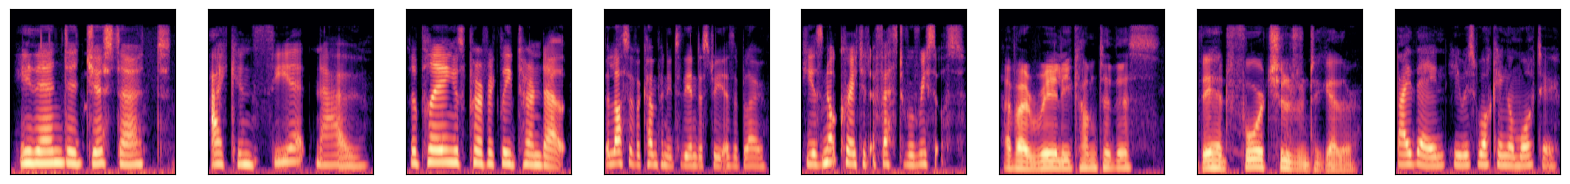

In [25]:
images, labels = load_images_from_path(spath_clean, 0)
show_images(images)
    
x += images
y += labels

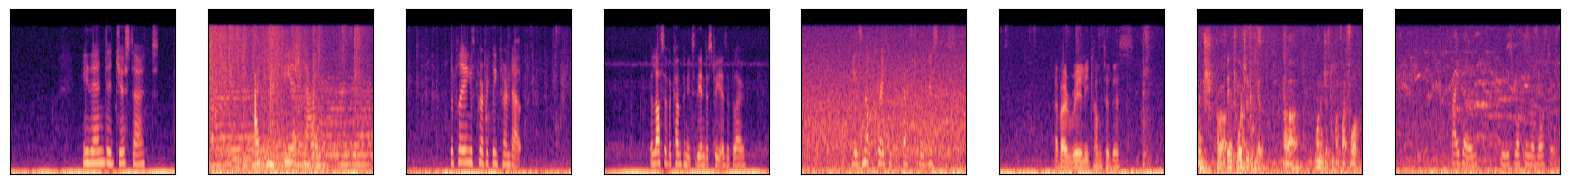

In [26]:
images, labels = load_images_from_path(spath_0dB, 1)
show_images(images)
    
x += images
y += labels

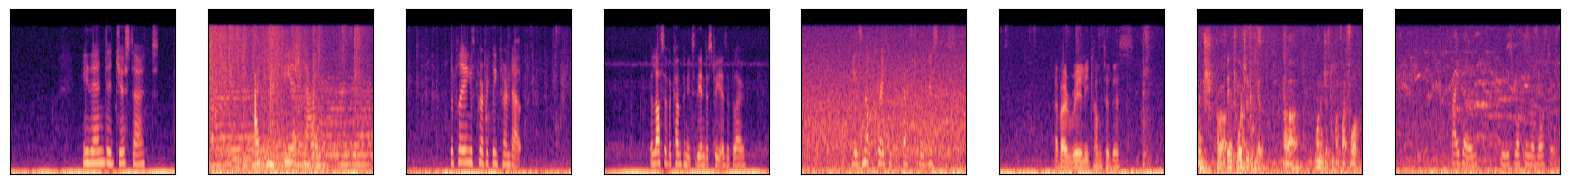

In [27]:
images, labels = load_images_from_path(spath_n3dB, 2)
show_images(images)
    
x += images
y += labels

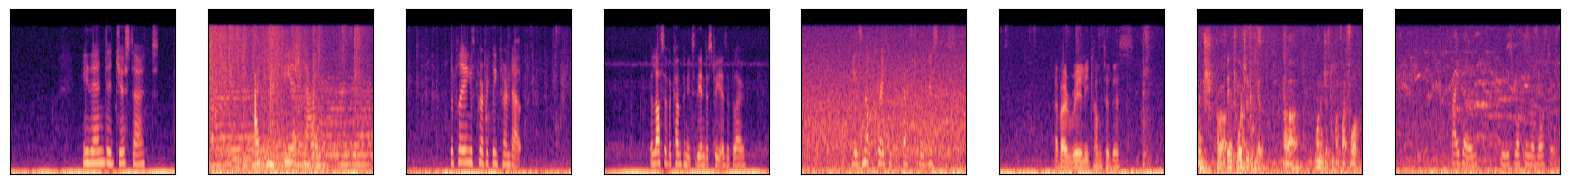

In [28]:
images, labels = load_images_from_path(spath_n6dB, 3)
show_images(images)
    
x += images
y += labels

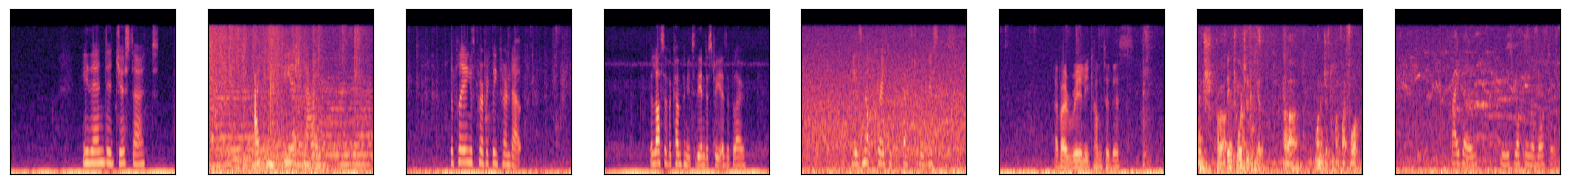

In [29]:
images, labels = load_images_from_path(spath_n9dB, 4)
show_images(images)
    
x += images
y += labels

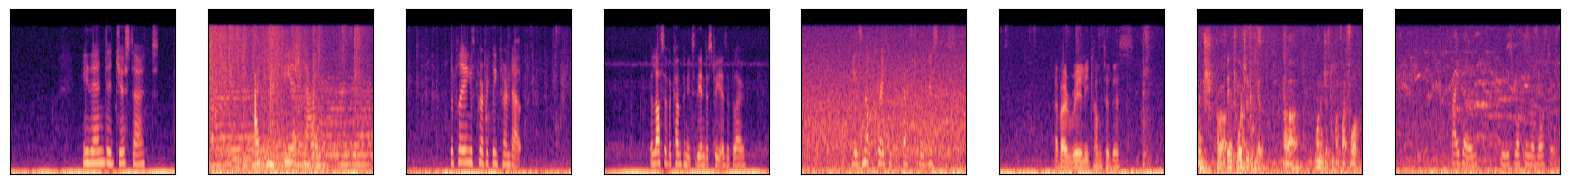

In [30]:
images, labels = load_images_from_path(spath_3dB, 5)
show_images(images)
    
x += images
y += labels

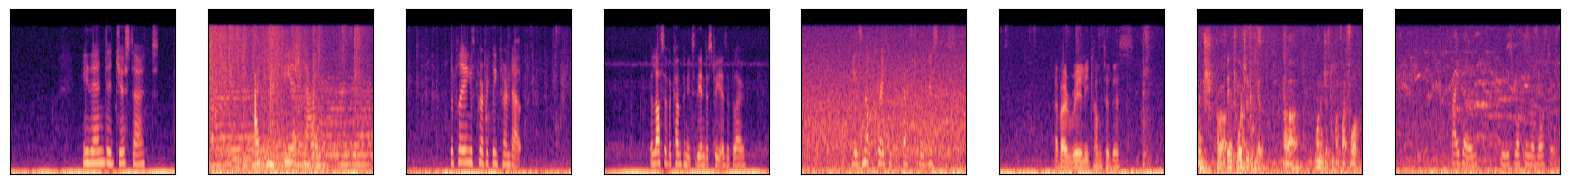

In [31]:
images, labels = load_images_from_path(spath_6dB, 6)
show_images(images)
    
x += images
y += labels

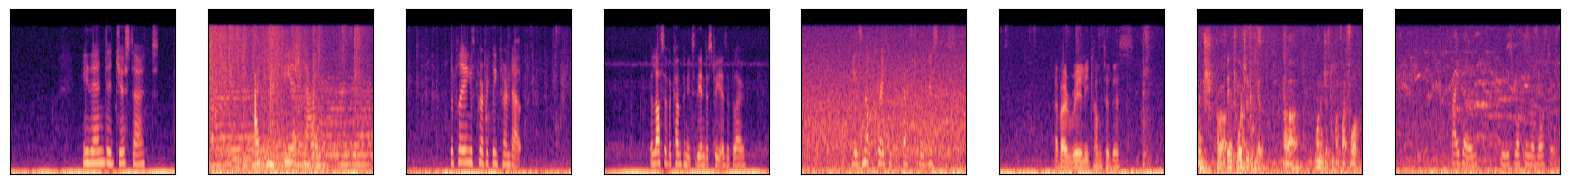

In [32]:
images, labels = load_images_from_path(spath_9dB, 7)
show_images(images)
    
x += images
y += labels

Step 3) Spliting the dataset into training and testing 80/20, respectively 

In [33]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=0)

# Normalize the data
x_train_norm = np.array(x_train) / 255
x_val_norm = np.array(x_val) / 255
x_test_norm = np.array(x_test) / 255

# Encode the labels
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

In [34]:
# Convert the image data to PyTorch tensors and transpose dimensions
x_train_tensor = torch.tensor(x_train_norm.transpose((0, 3, 1, 2)), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.float32)

x_val_tensor = torch.tensor(x_val_norm.transpose((0, 3, 1, 2)), dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.float32)

x_test_tensor = torch.tensor(x_test_norm.transpose((0, 3, 1, 2)), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.float32)


# Define the dataset and data loaders
train_dataset = data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = data.DataLoader(train_dataset, batch_size=10, shuffle=True)

val_dataset = data.TensorDataset(x_val_tensor, y_val_tensor)
val_loader = data.DataLoader(val_dataset, batch_size=10, shuffle=False)

test_dataset = data.TensorDataset(x_test_tensor, y_test_tensor)
test_loader = data.DataLoader(test_dataset, batch_size=10, shuffle=False)

In [35]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 14 * 14, 1024)
        self.fc2 = nn.Linear(1024, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 128 * 14 * 14)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model and move it to the GPU if available
model = MyModel().to(device)


Step 4) Training the model with a batch size and epoch number of 10

Epoch 1/20, Train Loss: 1.7712, Train Acc: 0.2344, Val Loss: 1.7190, Val Acc: 0.2458
Epoch 2/20, Train Loss: 1.7163, Train Acc: 0.2518, Val Loss: 1.7305, Val Acc: 0.2458
Epoch 3/20, Train Loss: 1.7145, Train Acc: 0.2437, Val Loss: 1.7082, Val Acc: 0.2458
Epoch 4/20, Train Loss: 1.7259, Train Acc: 0.2474, Val Loss: 1.7261, Val Acc: 0.2475
Epoch 5/20, Train Loss: 1.7324, Train Acc: 0.2479, Val Loss: 1.7078, Val Acc: 0.2542
Epoch 6/20, Train Loss: 1.7082, Train Acc: 0.2503, Val Loss: 1.7056, Val Acc: 0.2483
Epoch 7/20, Train Loss: 1.7063, Train Acc: 0.2489, Val Loss: 1.7073, Val Acc: 0.2500
Epoch 8/20, Train Loss: 1.7057, Train Acc: 0.2426, Val Loss: 1.7063, Val Acc: 0.2492
Epoch 9/20, Train Loss: 1.7069, Train Acc: 0.2436, Val Loss: 1.7055, Val Acc: 0.2492
Epoch 10/20, Train Loss: 1.7072, Train Acc: 0.2495, Val Loss: 1.7045, Val Acc: 0.2492
Epoch 11/20, Train Loss: 1.7087, Train Acc: 0.2414, Val Loss: 1.7037, Val Acc: 0.2492
Epoch 12/20, Train Loss: 1.7049, Train Acc: 0.2461, Val Loss: 1

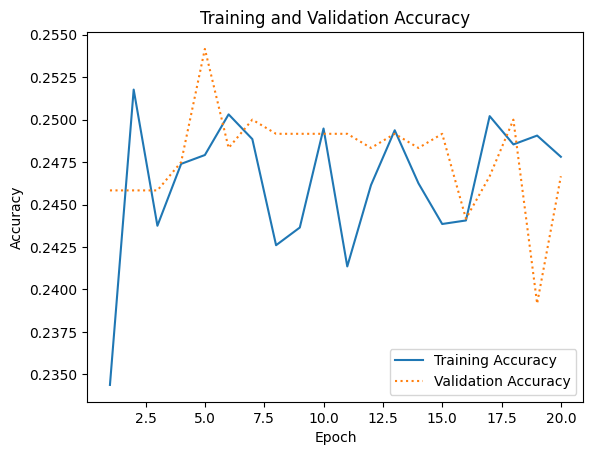

In [36]:
import torch.optim as optim
import torch.nn.functional as F

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, torch.argmax(labels, dim=1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, torch.argmax(labels, dim=1))

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

    val_loss /= len(val_loader)
    val_acc = correct / total

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# Create a range of epochs
epochs = range(1, num_epochs + 1)

# Plot the training accuracy
plt.plot(epochs, train_accuracies, '-', label='Training Accuracy')

# Plot the validation accuracy
plt.plot(epochs, val_accuracies, ':', label='Validation Accuracy')

# Set the title and labels for the plot
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()


Step 5) Evaluation

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [38]:
import seaborn as sns

Test Loss: 1.7080, Test Acc: 0.2425


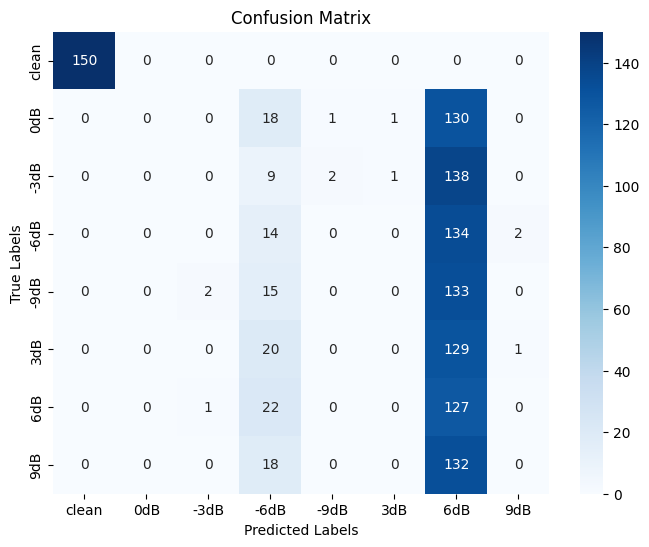

In [39]:
# Evaluate the model on the testing data
model.eval()
test_loss = 0.0
correct = 0
total = 0
predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, torch.argmax(labels, dim=1))

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

        predictions.extend(predicted.tolist())
        true_labels.extend(torch.argmax(labels, dim=1).tolist())

test_loss /= len(test_loader)
test_acc = correct / total

print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Convert the predictions and true labels to numpy arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Define the target class names
target_names = ['clean', '0dB', '-3dB', '-6dB', '-9dB', '3dB', '6dB', '9dB']
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=target_names, yticklabels=target_names)

# Set the title and labels for the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

In [40]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

accuracy = correct / total
print(f"Prediction Accuracy: {accuracy:.4f}")


Prediction Accuracy: 0.2425


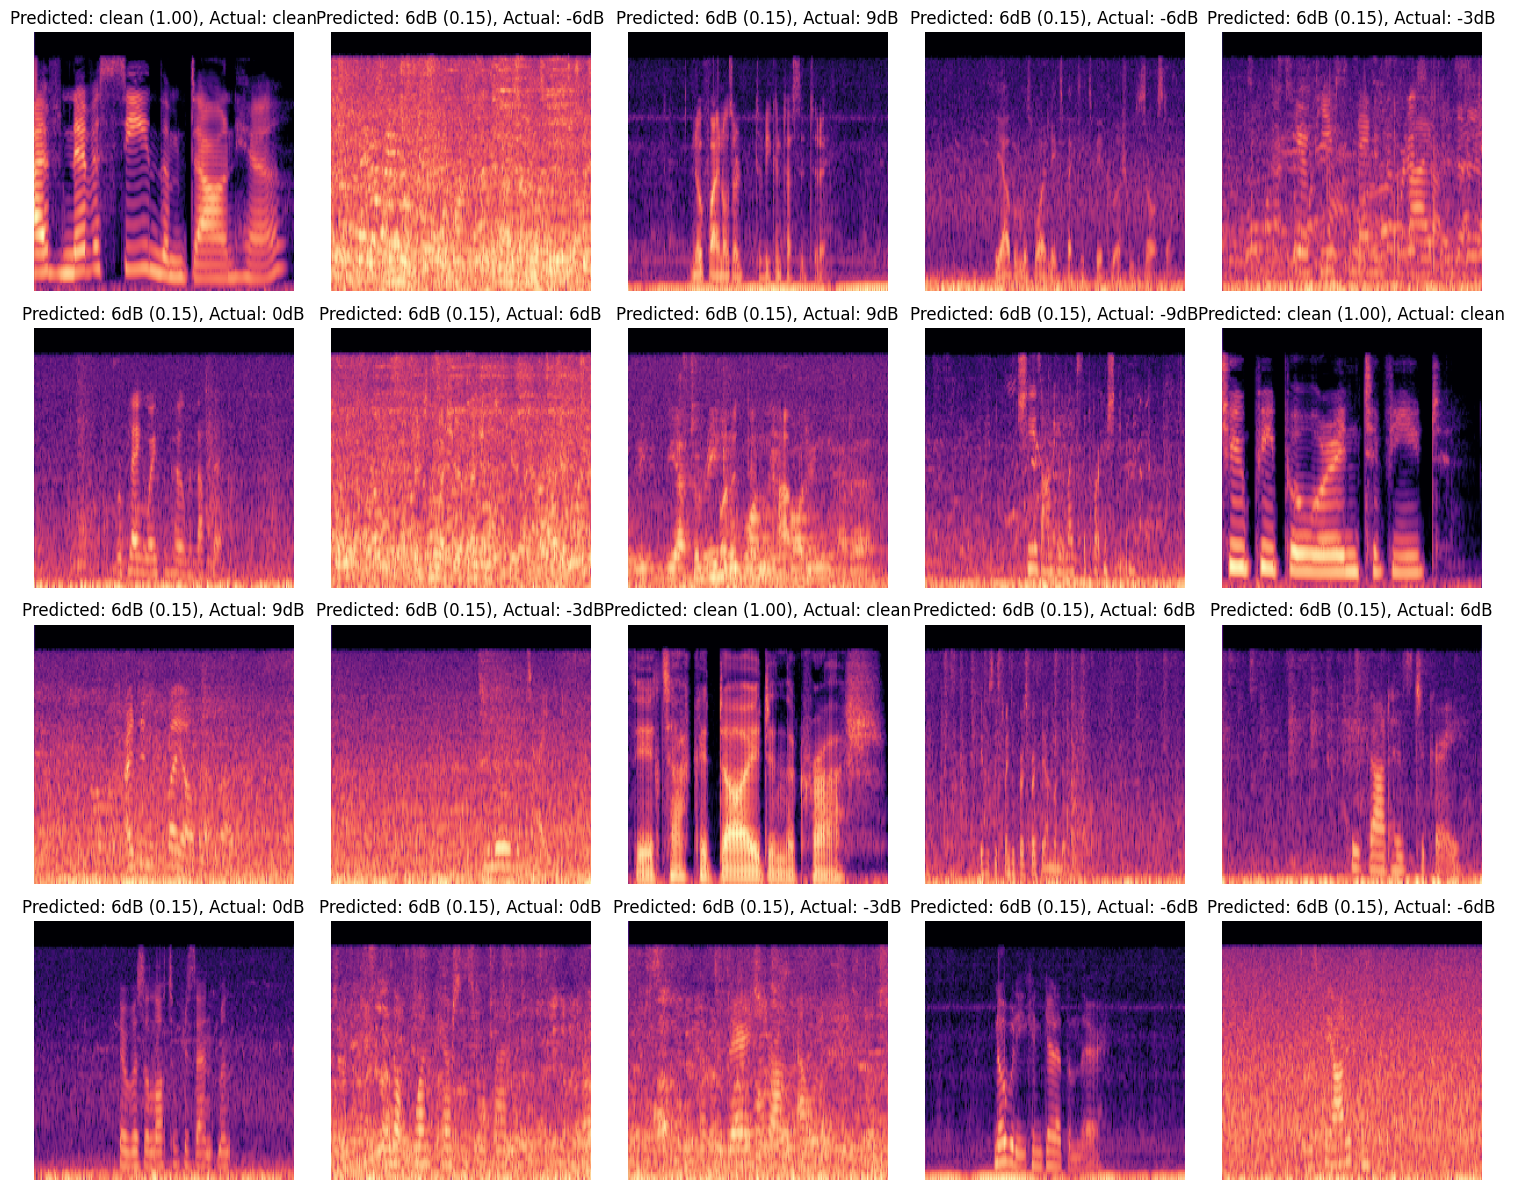

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Select 20 random indices from the test dataset
indices = np.random.choice(len(test_dataset), size=20, replace=False)

# Set the model to evaluation mode
model.eval()
target_names = ["clean", "0dB", "-3dB", "-6dB", "-9dB", "3dB", "6dB", "9dB"]
# Create subplots with 5 columns and 4 rows
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.ravel()

# Iterate over the selected indices
for i, index in enumerate(indices):
    # Get the image and label at the current index
    image, label = test_dataset[index]
    image = image.unsqueeze(0).to(device)

    # Forward pass through the model
    with torch.no_grad():
        output = model(image)
        probabilities = F.softmax(output, dim=1)
        predicted_label = torch.argmax(output).item()

    # Convert predicted and actual labels to class names
    predicted_class = target_names[predicted_label]
    actual_class = target_names[y_test[index]]

    # Display the heatmap
    axes[i].imshow(image.squeeze().permute(1, 2, 0).cpu())
    axes[i].set_title(f"Predicted: {predicted_class} ({probabilities[0, predicted_label]:.2f}), Actual: {actual_class}")
    axes[i].axis("off")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()



Step 6) Saving the model

In [42]:
# Save the trained model
torch.save(model.state_dict(), 'modelVA.pth')

Step 7) Loading the model

In [43]:
# Load the saved model
model = MyModel()  # Create an instance of the model
model.load_state_dict(torch.load('models/modelVA.pth'))
model.eval()  # Set the model to evaluation mode

MyModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=25088, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=8, bias=True)
)

Step 8) Testing model with test_dataset

In [44]:
from keras.utils import load_img, img_to_array

def preprocess_spectrogram(image_path):
    image = img_to_array(load_img(image_path, target_size=(224, 224, 3))) / 255.0
    return torch.tensor(image.transpose((2, 0, 1)), dtype=torch.float32)

In [45]:
def predict_spectrogram(model, image_path):
    model.eval()
    with torch.no_grad():
        image = preprocess_spectrogram(image_path)
        image = image.unsqueeze(0)  # Add batch dimension as the model expects a batch of images
        output = model(image)
        _, predicted_class = torch.max(output.data, 1)
        return predicted_class.item()

In [11]:
import torch.nn.functional as F
image_path = "Spectrograms_wide_ASNR/0dB/speech_3.png"
predicted_class = predict_spectrogram(model, image_path)
target_names = ["clean", "0dB", "-3dB", "-6dB", "-9dB", "3dB", "6dB", "9dB"]
print("Predicted class:", target_names[predicted_class])


Predicted class: 9dB


In [114]:
image_paths = os.listdir("Spectrograms_wide_OVA2/0dB")
len(image_paths)

1500

In [14]:
correct = 0
same = 0
name_img = "Spectrograms_wide_VA/-9dB/"
image_paths = os.listdir(name_img)
noisy = ["-3dB", "-6dB", "-9dB"]
clean = ["0dB", "3dB", "6dB", "9dB"]

for image_path in image_paths:
    predicted_class = predict_spectrogram(model, name_img + image_path)
    if target_names[predicted_class] == "-9dB":
        same += 1
    if target_names[predicted_class] in noisy:
        correct += 1
    print("Image: {}, Predicted: {}".format(image_path, target_names[predicted_class]))
    
print("SAME SNR Accuracy: {:.2f}%".format(same / len(image_paths) * 100))    
print("IN CATEGORY Accuracy: {:.2f}%".format(correct / len(image_paths) * 100))
print(correct)
print(same)


Image: speech_1.png, Predicted: 9dB
Image: speech_10.png, Predicted: 9dB
Image: speech_100.png, Predicted: 9dB
Image: speech_1000.png, Predicted: 9dB
Image: speech_1001.png, Predicted: 9dB
Image: speech_1002.png, Predicted: 9dB
Image: speech_1003.png, Predicted: 9dB
Image: speech_1004.png, Predicted: 9dB
Image: speech_1005.png, Predicted: 9dB
Image: speech_1006.png, Predicted: 9dB
Image: speech_1007.png, Predicted: 9dB
Image: speech_1008.png, Predicted: 9dB
Image: speech_1009.png, Predicted: 9dB
Image: speech_101.png, Predicted: 9dB
Image: speech_1010.png, Predicted: 9dB
Image: speech_1011.png, Predicted: 9dB
Image: speech_1012.png, Predicted: 9dB
Image: speech_1013.png, Predicted: 9dB
Image: speech_1014.png, Predicted: 9dB
Image: speech_1015.png, Predicted: 9dB
Image: speech_1016.png, Predicted: 9dB
Image: speech_1017.png, Predicted: 9dB
Image: speech_1018.png, Predicted: 9dB
Image: speech_1019.png, Predicted: 9dB
Image: speech_102.png, Predicted: 9dB
Image: speech_1020.png, Predicted

Testing Audio

In [15]:
import torch.nn.functional as F
audio_path = "testing_audio"
os.makedirs(audio_path + "/spectrogram", exist_ok=True)
create_pngs_from_wavs(audio_path + "/audio", audio_path + "/spectrogram")

In [17]:
image_paths = os.listdir(audio_path + "/spectrogram")
len(image_paths)

4

In [18]:
import torch.nn.functional as F
audio_path = "testing_audio"
target_names = ["clean", "0dB", "-3dB", "-6dB", "-9dB", "3dB", "6dB", "9dB"]
name_img = audio_path + "/spectrogram/"
image_paths = os.listdir(name_img)

for image_path in image_paths:
    predicted_class = predict_spectrogram(model, name_img + image_path)
    print("Predicted class:", target_names[predicted_class])

Predicted class: 9dB
Predicted class: 9dB
Predicted class: 9dB
Predicted class: 9dB
